In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("rainfall.csv")

df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%y", errors='coerce')
df = df.sort_values("datetime")

df = df.dropna(subset=["datetime"])

# Create lag features
for lag in range(1, 4):
    df[f'windspeed_lag{lag}'] = df['windspeed'].shift(lag)

df = df.dropna().reset_index(drop=True)


In [ ]:
X = df[['temp', 'humidity', 'dew', 'sealevelpressure', 'winddir', 'solarradiation', 'precipprob','windspeed_lag1', 'windspeed_lag2', 'windspeed_lag3']]

y = df['windspeed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

def evaluate_regression(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Test metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{name} Regression Performance:\n")
    print("Train:")
    print(f" MAE : {train_mae:.2f}")
    print(f" RMSE: {train_rmse:.2f}")
    print(f" R²   : {train_r2:.3f}")
    
    print("\nTest:")
    print(f" MAE : {test_mae:.2f}")
    print(f" RMSE: {test_rmse:.2f}")
    print(f" R²   : {test_r2:.3f}")


    #For Train Data- to check for overfitting
    plt.figure(figsize=(10,5))
    plt.plot(y_train.values[:100], label='Actual', marker='o')
    plt.plot(y_train_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Wind Speed Prediction (Training Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Wind Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #For Test Data
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values[:100], label='Actual', marker='o')
    plt.plot(y_test_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Wind Speed Prediction (Testing Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Wind Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Linear Regression Regression Performance:

Train:
 MAE : 2.73
 RMSE: 4.91
 R²   : 0.329

Test:
 MAE : 2.90
 RMSE: 3.85
 R²   : 0.498


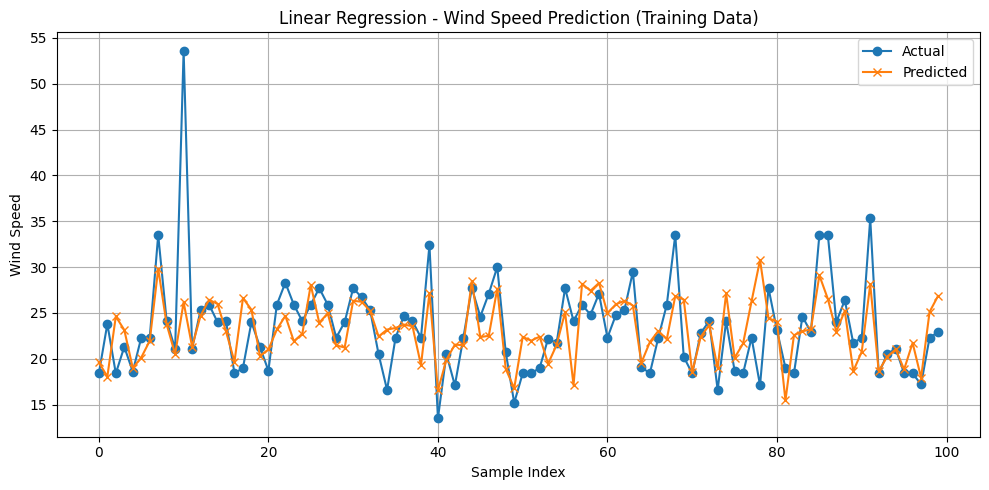

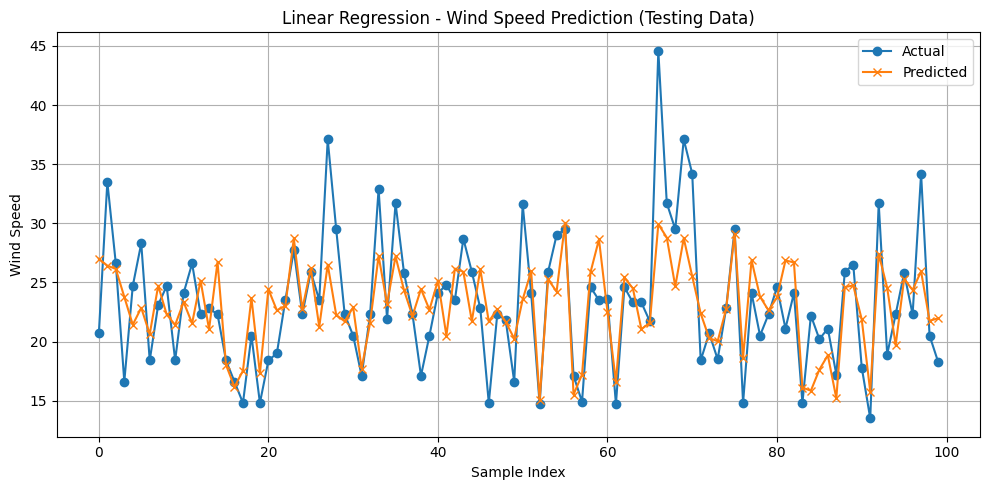

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_regression("Linear Regression", lr,X_train, y_train, X_test, y_test)

Lasso Regression Regression Performance:

Train:
 MAE : 2.70
 RMSE: 4.93
 R²   : 0.325

Test:
 MAE : 2.86
 RMSE: 3.79
 R²   : 0.514


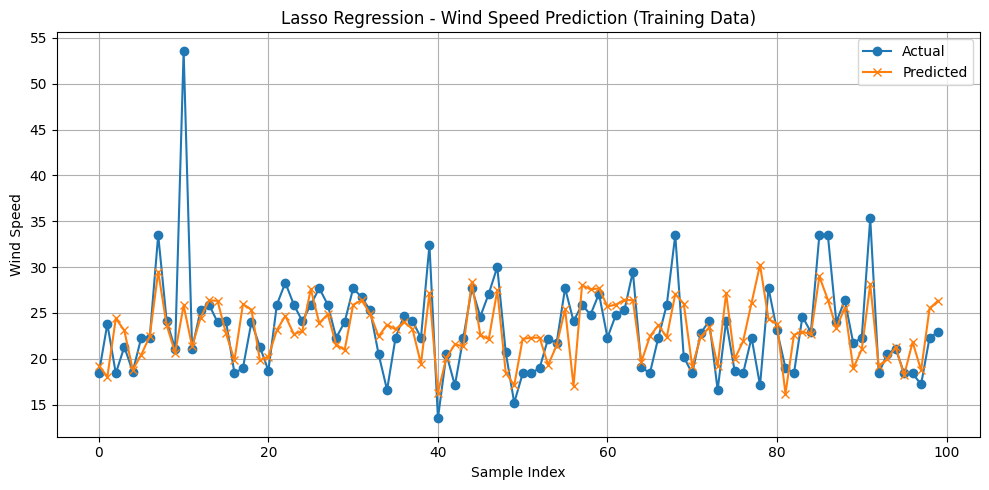

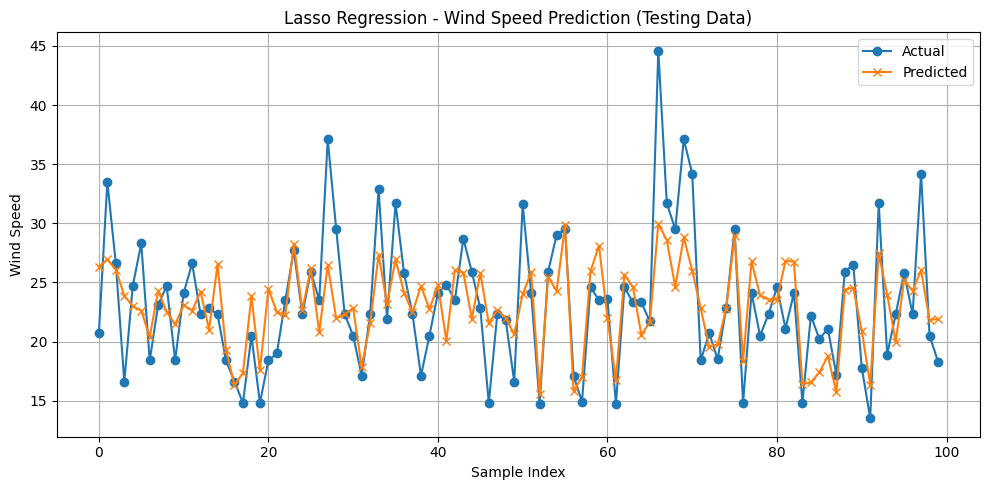

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_regression("Lasso Regression", lasso,X_train, y_train, X_test, y_test)

SVR Regression Performance:

Train:
 MAE : 0.10
 RMSE: 0.10
 R²   : 1.000

Test:
 MAE : 3.98
 RMSE: 5.41
 R²   : 0.007


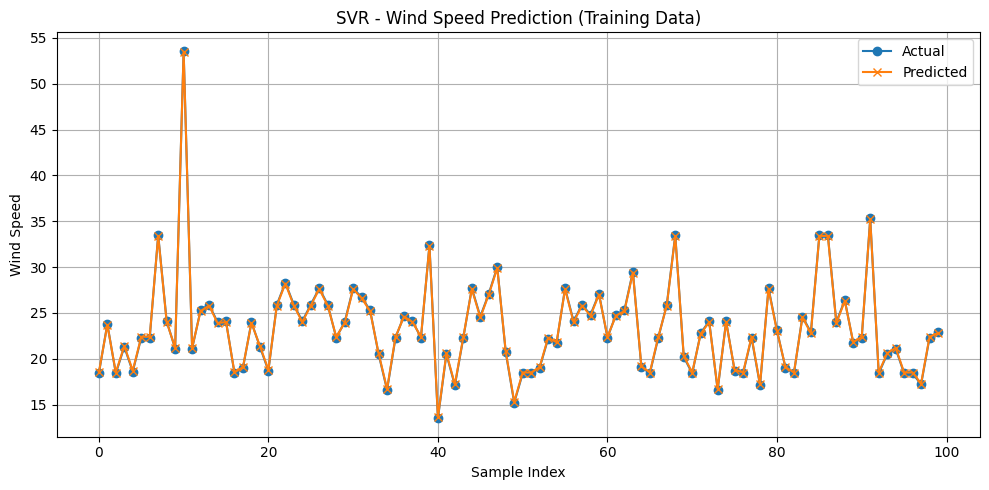

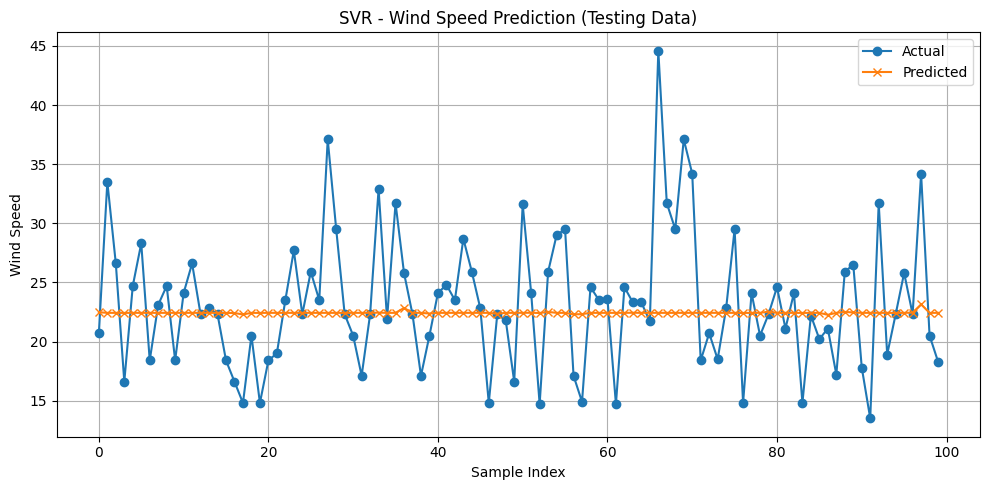

In [ ]:
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)
evaluate_regression("SVR", svr,X_train, y_train, X_test, y_test)

Random Forest Regression Performance:

Train:
 MAE : 2.17
 RMSE: 3.66
 R²   : 0.627

Test:
 MAE : 2.88
 RMSE: 3.80
 R²   : 0.512


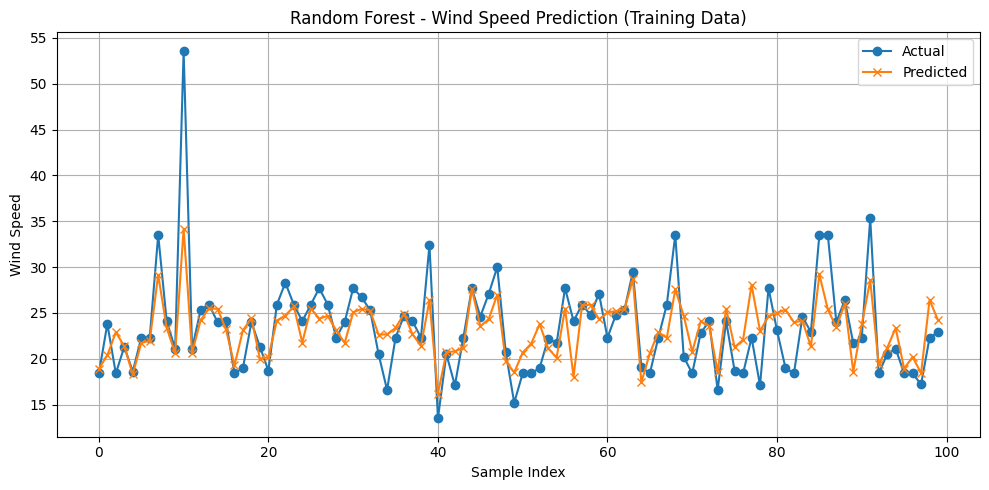

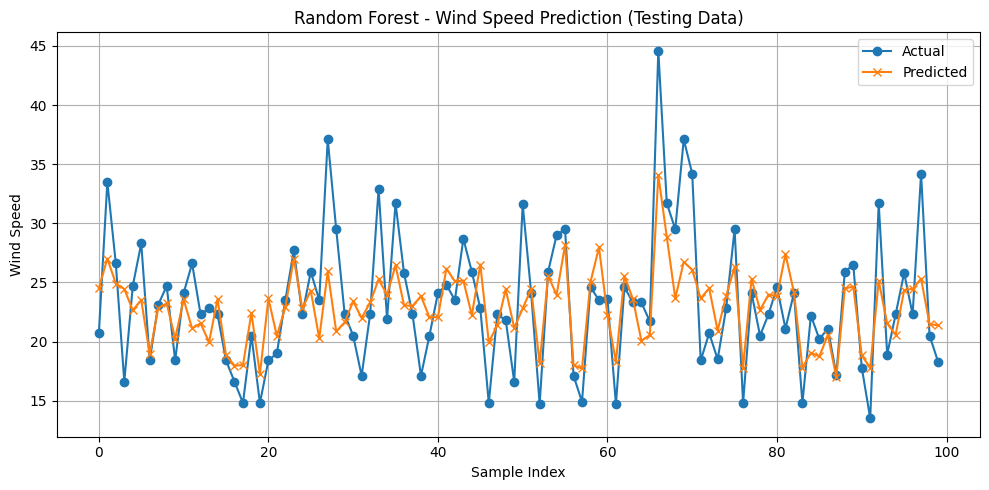

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    max_features='sqrt',
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
evaluate_regression("Random Forest", rf,X_train, y_train, X_test, y_test)


XGBoost Regression Performance:

Train:
 MAE : 0.70
 RMSE: 0.95
 R²   : 0.975

Test:
 MAE : 3.04
 RMSE: 4.18
 R²   : 0.408


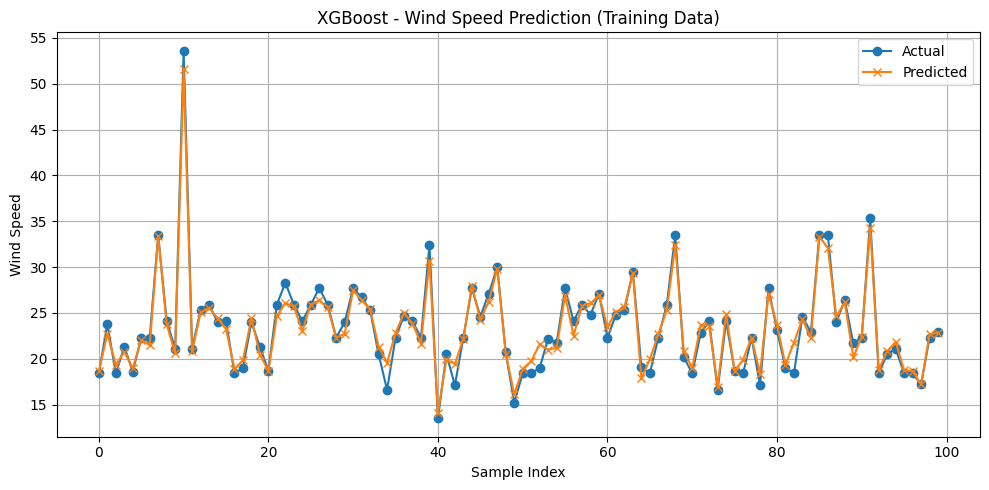

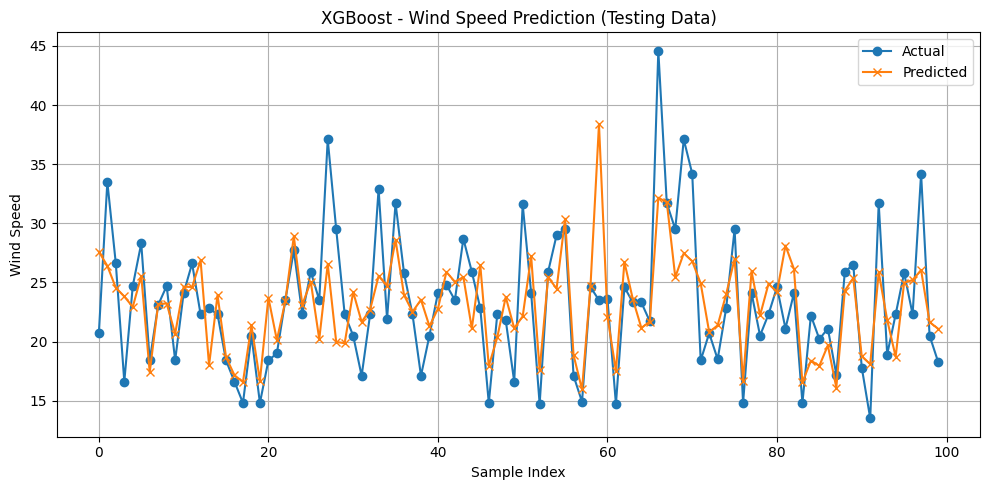

In [18]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
evaluate_regression("XGBoost", xgb,X_train, y_train, X_test, y_test)


Conclusion: As per our testing, it can be concluded that Lasso Regression performs the best for predicting windspeed in this dataset